In [7]:
import tensorflow as tf
tf.enable_eager_execution() # For using numpy on Tensorflow 1.14
import numpy as np
import matplotlib.pyplot as plt

In [2]:
a = tf.constant(2.0)
y = tf.constant(8.0)
# 변수
x = tf.Variable(10.0)

print(a)
print(x)

loss = tf.math.abs(a*x - y)
loss

tf.Tensor(2.0, shape=(), dtype=float32)
<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=10.0>


<tf.Tensor: id=16, shape=(), dtype=float32, numpy=12.0>

In [3]:
loss.numpy()

12.0

In [4]:
def train_func():
    with tf.GradientTape() as tape:
        loss = tf.math.abs(a*x - y)

    dx = tape.gradient(loss, x)
    print('x = {}, dx = {}'.format(x.numpy(), dx))

    x.assign(x - dx) # x = x - dx
# Run train_func() UDF repeately
for i in range(4):
    train_func()

x = 10.0, dx = 2.0
x = 8.0, dx = 2.0
x = 6.0, dx = 2.0
x = 4.0, dx = 0.0


GradientTape : https://www.tensorflow.org/guide/autodiff?hl=ko

## Gradient 계산하기

In [5]:
%%time
# 데이터 집합 생성
x = np.array(np.arange(-5, 5, 0.1))
y = 2*x*x + 3*x +5
# 계수 설정 : 초기값
lr = 0.001

w1 = tf.Variable(1.0)
w2 = tf.Variable(1.0)
b = tf.Variable(1.0)

# 학습
histLoss = []
for epoch in range(10000):
    with tf.GradientTape() as tape:
        loss = tf.sqrt(tf.reduce_mean(tf.square(w1*x*x + w2*x + b - y))) # forward 기록
    
    # 각 파라미터의 gradient 값 (미분)
    dw1, dw2, db = tape.gradient(loss, [w1, w2, b])
    
    # weight update (매개변수 갱신)
    # sub = subtract
    w1.assign_sub(lr*dw1) # w1 = w1 - lr *dw
    w2.assign_sub(lr*dw2)
    b.assign_sub(lr*db)
    
    histLoss.append(loss)
    if epoch % 500 == 0:
        print("epoch = {}, loss = {}".format(epoch, loss))

epoch = 0, loss = 15.339600563049316
epoch = 500, loss = 3.654714584350586
epoch = 1000, loss = 2.3881609439849854
epoch = 1500, loss = 2.092434883117676
epoch = 2000, loss = 1.8692306280136108
epoch = 2500, loss = 1.6479507684707642
epoch = 3000, loss = 1.4266934394836426
epoch = 3500, loss = 1.2054353952407837
epoch = 4000, loss = 0.9841772317886353
epoch = 4500, loss = 0.7629194259643555
epoch = 5000, loss = 0.5416613221168518
epoch = 5500, loss = 0.32040339708328247
epoch = 6000, loss = 0.09914518892765045
epoch = 6500, loss = 0.06283099204301834
epoch = 7000, loss = 0.06286193430423737
epoch = 7500, loss = 0.06295895576477051
epoch = 8000, loss = 0.06295895576477051
epoch = 8500, loss = 0.06295895576477051
epoch = 9000, loss = 0.06295895576477051
epoch = 9500, loss = 0.06295895576477051
Wall time: 18.8 s



추정 결과 :
w1 = 2.01
w2 = 3.00
b = 5.00
final loss = 0.0627


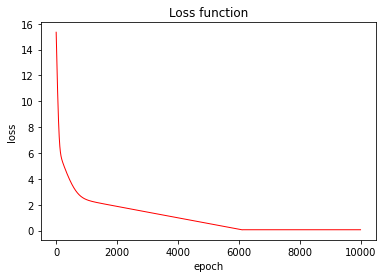

In [6]:
print("\n추정 결과 :")
print("w1 = %.2f" % w1.numpy())
print("w2 = %.2f" % w2.numpy())
print("b = %.2f" % b.numpy())
print("final loss = %.4f" % loss.numpy())

plt.plot(histLoss, color='red', linewidth=1)
plt.title("Loss function")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()

# SGD + Momentum

In [8]:
import tensorflow as tf
from tensorflow.keras import optimizers
import numpy as np
import matplotlib.pyplot as plt

In [11]:
%%time
# y = 2x^2 + 3x + 5 일 때 x, y 집합을 생성한다
x = np.array(np.arange(-5, 5, 0.1))
y = 2 * x * x + 3 * x + 5

# 그래프를 생성한다.   
w1 = tf.Variable(1.0)
w2 = tf.Variable(1.0)
b = tf.Variable(1.0)
var_list = [w1, w2, b]  # variable list

# SGD optimizers 기능을 사용하고, Momentum 방법을 사용한다.
opt = optimizers.SGD(learning_rate=0.001, momentum = 0.7, nesterov = False)

histLoss = []
for epoch in range(10000):
    with tf.GradientTape() as tape:
        loss = tf.sqrt(tf.reduce_mean(tf.square(w1*x*x + w2*x + b - y)))
    
    grads = tape.gradient(loss, var_list)
    opt.apply_gradients(zip(grads, var_list))
    
    if epoch % 500 == 0:
        histLoss.append(loss.numpy())
        print("epoch = {}, loss = {}".format(epoch, loss))

epoch = 0, loss = 15.339600563049316
epoch = 500, loss = 2.023297071456909
epoch = 1000, loss = 1.2853883504867554
epoch = 1500, loss = 0.5479283928871155
epoch = 2000, loss = 0.0375760942697525
epoch = 2500, loss = 0.03759327903389931
epoch = 3000, loss = 0.03759327903389931
epoch = 3500, loss = 0.03759327903389931
epoch = 4000, loss = 0.03759327903389931
epoch = 4500, loss = 0.03759327903389931
epoch = 5000, loss = 0.03759327903389931
epoch = 5500, loss = 0.03759327903389931
epoch = 6000, loss = 0.03759327903389931
epoch = 6500, loss = 0.03759327903389931
epoch = 7000, loss = 0.03759327903389931
epoch = 7500, loss = 0.03759327903389931
epoch = 8000, loss = 0.03759327903389931
epoch = 8500, loss = 0.03759327903389931
epoch = 9000, loss = 0.03759327903389931
epoch = 9500, loss = 0.03759327903389931
Wall time: 21.9 s


## ↳ 전체 걸리는 시간이 더 걸리더라도 수렴하는 속도가 빠르다


추정 결과 :
w1 = 2.00
w2 = 3.00
b = 5.00
final loss = 0.0363


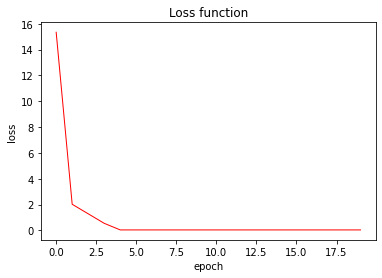

In [12]:
print("\n추정 결과 :")
print("w1 = %.2f" % w1.numpy())
print("w2 = %.2f" % w2.numpy())
print("b = %.2f" % b.numpy())
print("final loss = %.4f" % loss.numpy())

plt.plot(histLoss, color='red', linewidth=1)
plt.title("Loss function")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()

# Adam + minimize()

In [ ]:
import tensorflow as tf
from tensorflow.keras import optimizers
import numpy as np
import matplotlib.pyplot as plt

# y = 2x^2 + 3x + 5 일 때 x, y 집합을 생성한다
x = np.array(np.arange(-5, 5, 0.1))
y = 2 * x * x + 3 * x + 5

# 그래프를 생성한다.   
w1 = tf.Variable(1.0)
w2 = tf.Variable(1.0)
b = tf.Variable(1.0)

In [13]:
def loss():
    return tf.sqrt(tf.reduce_mean(tf.square(w1*x*x + w2*x + b - y)))

opt = optimizers.Adam(learning_rate = 0.05)

histLoss = []
for epoch in range(10000):
    opt.minimize(loss, var_list=[w1, w2, b])
    
    histLoss.append(loss())
    if epoch % 500 == 0:
        print("epoch : {}, loss = {}".format(epoch, histLoss[-1]))

epoch : 0, loss = 0.5833761096000671
epoch : 500, loss = 0.032910510897636414
epoch : 1000, loss = 0.03279978781938553
epoch : 1500, loss = 0.03276091068983078
epoch : 2000, loss = 0.03275883570313454
epoch : 2500, loss = 0.03273390233516693
epoch : 3000, loss = 0.03273883834481239
epoch : 3500, loss = 0.032751549035310745
epoch : 4000, loss = 0.03275449573993683
epoch : 4500, loss = 0.03275714069604874
epoch : 5000, loss = 0.03275816887617111
epoch : 5500, loss = 0.03276272118091583
epoch : 6000, loss = 0.03276502341032028
epoch : 6500, loss = 0.03276502341032028
epoch : 7000, loss = 0.03276502341032028
epoch : 7500, loss = 0.032765116542577744
epoch : 8000, loss = 0.0327686108648777
epoch : 8500, loss = 0.032801199704408646
epoch : 9000, loss = 0.03280602768063545
epoch : 9500, loss = 0.032824739813804626



추정 결과 :
w1 = 2.00
w2 = 3.00
b = 5.00


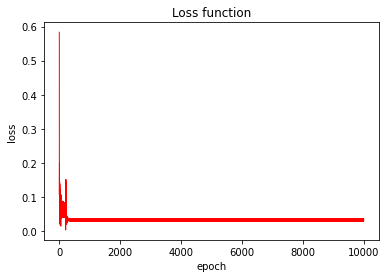

In [14]:
print("\n추정 결과 :")
print("w1 = %.2f" % w1.numpy())
print("w2 = %.2f" % w2.numpy())
print("b = %.2f" % b.numpy())

plt.plot(histLoss, color='red', linewidth=1)
plt.title("Loss function")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()

# Keras 
## Sequential model

Epoch 1/300
100/100 [==============================] - 0s 670us/sample - loss: 1256.6769
Epoch 2/300
100/100 [==============================] - 0s 130us/sample - loss: 906.7046
Epoch 3/300
100/100 [==============================] - 0s 120us/sample - loss: 608.1736
Epoch 4/300
100/100 [==============================] - 0s 110us/sample - loss: 403.8337
Epoch 5/300
100/100 [==============================] - 0s 130us/sample - loss: 247.1991
Epoch 6/300
100/100 [==============================] - 0s 140us/sample - loss: 150.6928
Epoch 7/300
100/100 [==============================] - 0s 150us/sample - loss: 83.9817
Epoch 8/300
100/100 [==============================] - 0s 110us/sample - loss: 48.1021
Epoch 9/300
100/100 [==============================] - 0s 130us/sample - loss: 27.3953
Epoch 10/300
100/100 [==============================] - 0s 140us/sample - loss: 14.2413
Epoch 11/300
100/100 [==============================] - 0s 140us/sample - loss: 8.9102
Epoch 12/300
100/100 [=============

100/100 [==============================] - 0s 110us/sample - loss: 0.0030
Epoch 96/300
100/100 [==============================] - 0s 150us/sample - loss: 0.0027
Epoch 97/300
100/100 [==============================] - 0s 170us/sample - loss: 0.0024
Epoch 98/300
100/100 [==============================] - 0s 140us/sample - loss: 0.0021
Epoch 99/300
100/100 [==============================] - 0s 160us/sample - loss: 0.0019
Epoch 100/300
100/100 [==============================] - 0s 130us/sample - loss: 0.0017
Epoch 101/300
100/100 [==============================] - 0s 160us/sample - loss: 0.0015
Epoch 102/300
100/100 [==============================] - 0s 170us/sample - loss: 0.0013
Epoch 103/300
100/100 [==============================] - 0s 130us/sample - loss: 0.0012
Epoch 104/300
100/100 [==============================] - 0s 150us/sample - loss: 0.0010
Epoch 105/300
100/100 [==============================] - 0s 140us/sample - loss: 9.2924e-04
Epoch 106/300
100/100 [=======================

100/100 [==============================] - 0s 140us/sample - loss: 1.1626e-10
Epoch 273/300
100/100 [==============================] - 0s 139us/sample - loss: 1.1626e-10
Epoch 274/300
100/100 [==============================] - 0s 130us/sample - loss: 1.1626e-10
Epoch 275/300
100/100 [==============================] - 0s 130us/sample - loss: 1.1181e-10
Epoch 276/300
100/100 [==============================] - 0s 120us/sample - loss: 1.0865e-10
Epoch 277/300
100/100 [==============================] - 0s 100us/sample - loss: 1.0429e-10
Epoch 278/300
100/100 [==============================] - 0s 164us/sample - loss: 1.0429e-10
Epoch 279/300
100/100 [==============================] - 0s 120us/sample - loss: 1.0429e-10
Epoch 280/300
100/100 [==============================] - 0s 130us/sample - loss: 1.0429e-10
Epoch 281/300
100/100 [==============================] - 0s 130us/sample - loss: 1.0429e-10
Epoch 282/300
100/100 [==============================] - 0s 120us/sample - loss: 1.0429e-10
Ep

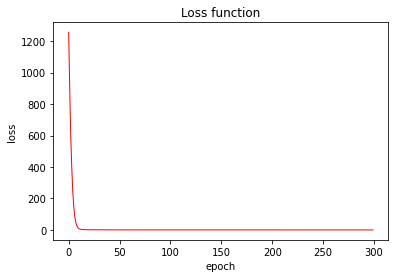

In [25]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras import optimizers
import numpy as np
import matplotlib.pyplot as plt

# y = 2x^2 + 3x + 5 일 때 x, y 집합을 생성한다
x = np.array(np.arange(-5, 5, 0.1))
y = 2 * x * x + 3 * x + 5
dataX = np.stack([x*x, x]).T

# 그래프를 생성한다.
model = Sequential()
model.add(Dense(1, input_dim = 2))
model.compile(loss='mse', optimizer=optimizers.Adam(lr=0.05))

h = model.fit(dataX, y, batch_size=10, epochs = 300)

# 학습 결과를 확인한다.
parameters = model.layers[0].get_weights()
print("\n추정 결과 :")
print("w1 = %.2f" % parameters[0][0][0])
print("w2 = %.2f" % parameters[0][1][0])
print("b = %.2f" % parameters[1][0])

plt.plot(h.history['loss'], color='red', linewidth=1)
plt.title("Loss function")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()

In [26]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


## Functional API


추정 결과 :
w1 = 1.99
w2 = 2.88
b = 4.98


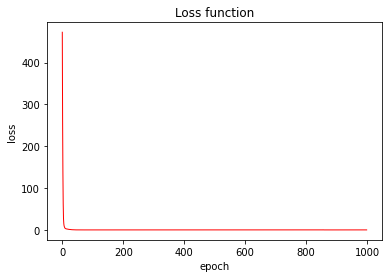

In [27]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras import optimizers
import numpy as np
import matplotlib.pyplot as plt

# y = 2x^2 + 3x + 5 일 때 x, y 집합을 생성한다
x = np.array(np.arange(-5, 5, 0.1))
y = 2 * x * x + 3 * x + 5
dataX = np.stack([x*x, x]).T

# 그래프를 생성한다.   
xInput = Input(batch_shape = (None, dataX.shape[1]))
yOutput = Dense(1)(xInput)

model = Model(xInput, yOutput)
model.compile(loss='mse', optimizer = optimizers.Adam(lr=0.05))

h = model.fit(dataX, y, batch_size=10, epochs = 1000, verbose = 0)

# 학습 결과를 확인한다.
parameters = model.layers[1].get_weights()
print("\n추정 결과 :")
print("w1 = %.2f" % parameters[0][0][0])
print("w2 = %.2f" % parameters[0][1][0])
print("b = %.2f" % parameters[1][0])

plt.plot(h.history['loss'], color='red', linewidth=1)
plt.title("Loss function")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()

In [28]:
model.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 2)]               0         
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


# tensorflow 1.4로 iris 분류

In [29]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


In [30]:
import numpy as np
import pandas as pd
from sklearn import datasets

In [31]:
iris = datasets.load_iris()
iris_X = iris.data
iris_y = pd.get_dummies(iris.target).to_numpy()

In [32]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(iris_X, iris_y, 
                                                    test_size=0.3,
                                                    random_state=1)

In [33]:
# X와 y를 저장할 변수 선언
x = tf.placeholder(tf.float32, [None, 4]) # 변수 수가 4개
y = tf.placeholder(tf.float32, [None, 3]) # 분류 클래스 수가 3개

In [34]:
# Weight와 bias를 저장할 변수 선언
W = tf.Variable(tf.zeros([4, 3]))
b = tf.Variable(tf.zeros([3]))

In [35]:
# 출력을 정의
h = tf.nn.softmax(tf.matmul(x, W) + b)

In [36]:
# 손실함수 정의
cross_entropy = -tf.reduce_sum(y*tf.log(h), reduction_indices=[1])
loss = tf.reduce_mean(cross_entropy)

In [37]:
# 학습(훈련) 정의(옵티마이저, 학습률)
train = tf.train.GradientDescentOptimizer(0.001).minimize(loss)

In [38]:
init = tf.global_variables_initializer()

In [39]:
sess = tf.Session()
sess.run(init)

In [40]:
for i in range(100000):
    _, loss_value = sess.run([train, loss], feed_dict={x:train_X, y:train_y})
    if i%10000 == 0:
        print(i, loss_value)

0 1.098612
10000 0.34161025
20000 0.25733855
30000 0.21406321
40000 0.18752669
50000 0.16956553
60000 0.1565753
70000 0.14672598
80000 0.13898852
90000 0.13273858


In [41]:
correct_prediction = tf.equal(tf.argmax(h, 1), tf.argmax(y, 1))

In [42]:
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [43]:
print(sess.run(accuracy, feed_dict={x:test_X, y:test_y}))

0.9777778
